---
---

#**MACHINE LEARNING: ALGORITMOS NO SUPERVISADOS**
Docente: Paulette N. Reyes Baeza

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github](https://github.com/paulette-reyes)

---
---

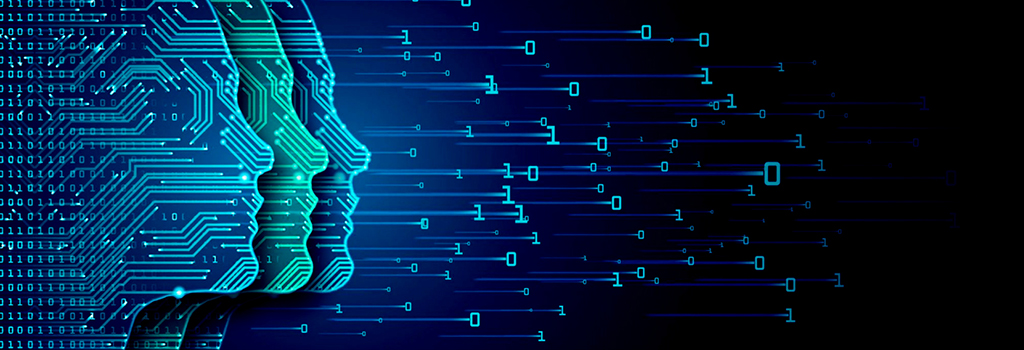

# **1. ENTENDIMIENTO DEL PROBLEMA**

**Dataset:**

Conjunto de datos de Cáncer de Mama de Wisconsin. Contiene 569 registros compuestos por 32 atributos (incluyendo el diagnóstico y un número de identificación). Todos los atributos están estrictamente relacionados con propiedades biológicas y morfológicas de los tumores.

FUENTE: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


**Objetivo:**

> Validar hipótesis de clasificación benigna o maligna de los tumores a través de la creación de clusters.

**Desarrollo:**

➡️ Utilice algoritmos no supervisados para encontrar patrones en los datos.

➡️ Realice un análisis de cluster (conglomerados)




---



✅ Importar librerías básicas

In [ ]:
#Librerías de Python

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

✅ Cargar archivo

In [ ]:
bc_dataset_path = 'wdbc.data'

bc_dataset_columns = ['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv(bc_dataset_path, index_col=0, names=bc_dataset_columns).fillna(0.0)

# **2. ANÁLISIS EXPLORATORIO**

In [ ]:
df.shape

(569, 31)

In [ ]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
905190,B,12.850,21.37,82.63,514.5,0.07551,0.08316,0.061260,0.018670,0.1580,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.183800,0.05601,0.2488,0.08151
924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,0.1566,...,13.89,35.74,88.84,595.7,0.12270,0.16200,0.243900,0.06493,0.2372,0.07242
895299,B,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,...,13.07,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037
864685,B,11.930,21.53,76.53,438.6,0.09768,0.07849,0.033280,0.020080,0.1688,...,13.67,26.15,87.54,583.0,0.15000,0.23990,0.150300,0.07247,0.2438,0.08541
853201,M,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,...,20.01,19.52,134.90,1227.0,0.12550,0.28120,0.248900,0.14560,0.2756,0.07919
90769601,B,11.130,16.62,70.47,381.1,0.08151,0.03834,0.013690,0.013700,0.1511,...,11.68,20.29,74.35,421.1,0.10300,0.06219,0.045800,0.04044,0.2383,0.07083
8911834,B,13.850,15.18,88.99,587.4,0.09516,0.07688,0.044790,0.037110,0.2110,...,14.98,21.74,98.37,670.0,0.11850,0.17240,0.145600,0.09993,0.2955,0.06912
917092,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.033320,0.024210,0.2197,...,10.57,17.84,67.84,326.6,0.18500,0.20970,0.099960,0.07262,0.3681,0.08982
926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.340300,0.14180,0.2218,0.07820


Clasificación de los tumores

In [ ]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Las desviaciones estándar varían desde 0.01 hasta 350, lo que significa que muchos vectores podrían ser extremadamente similares solo debido a uno o dos atributos. Por otro lado, normalizar el valor con una escala de varianza dará a todos los atributos la misma responsabilidad (por ejemplo, "area_mean" está limitada entre 143.5 y 2501, mientras que "smoothness_mean" está limitada entre 0.05 y 0.16). Forzarlos a tener la misma varianza puede influir en el impacto biológico de los factores y, como no tenemos ninguna indicación específica, no podemos tomar tal decisión.

Claramente, algunos atributos tendrán un peso mayor en el proceso de agrupamiento y aceptamos su influencia como una condición relacionada con el contexto.

Para el análisis preliminar tomamos las variables "perimeter_mean," "area_mean," "smoothness_mean," "concavity_mean," y "symmetry_mean".

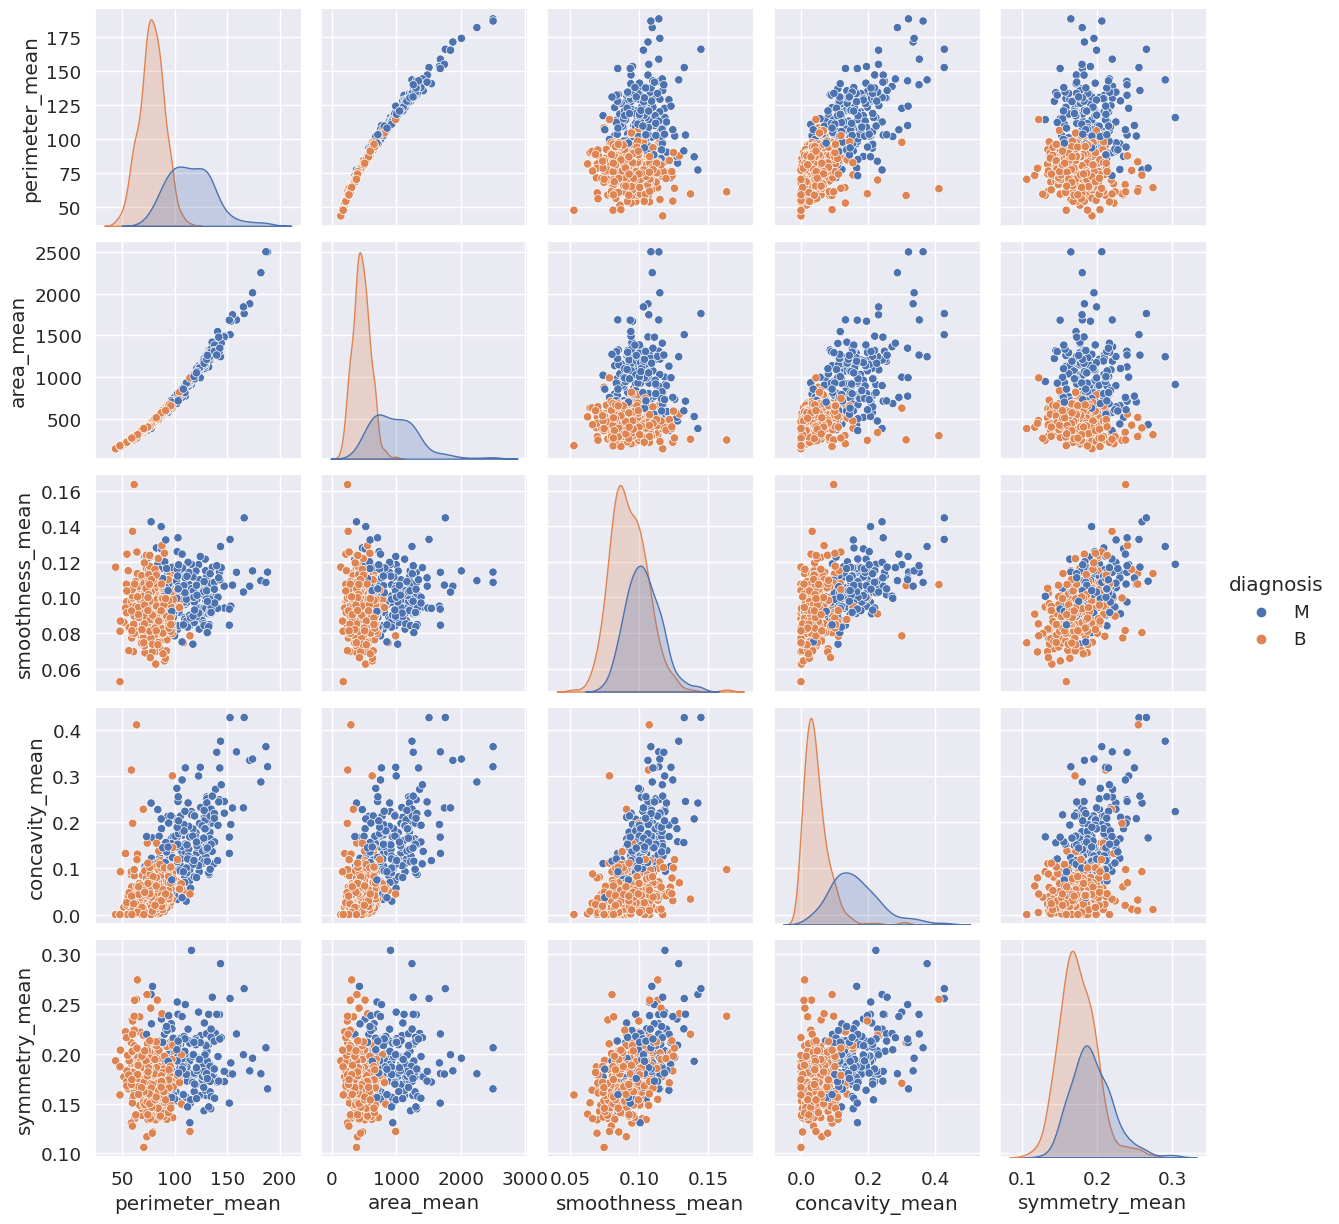

In [ ]:
# Pair-plot
sns.set()

with sns.plotting_context("notebook", font_scale=1.2):
  sns.pairplot(df,
               vars=['perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean'],
               hue="diagnosis")
plt.show()


El par de gráficos (pair-plot) muestra cada atributo no diagonal como una función de todos los demás, mientras que los gráficos diagonales representan las distribuciones de cada atributo dividido en dos componentes (en este caso, el diagnóstico). Por lo tanto, el segundo gráfico no diagonal (arriba a la izquierda) es el diagrama de "perimeter_mean" como función de "area_mean," y así sucesivamente.

Descubrimientos:

*   "area_mean" y "perimeter_mean" tienen una clara correlación y determinan una separación nítida. Cuando "area_mean" es mayor que aproximadamente 1.000, obviamente también el "perimeter" aumenta y el diagnóstico cambia abruptamente de tumor benigno a maligno. Por lo tanto, estos dos atributos son determinantes para el resultado final y es probable que uno de ellos sea redundante.

*   Otros gráficos (por ejemplo, "perimeter_mean/area_mean" versus "smoothness_mean," "area_mean" versus "symmetry_mean," "concavity_mean" versus "smoothness_mean," y "concavity_mean" versus "symmetry_mean") tienen una separación horizontal (que se convierte en vertical invirtiendo el eje). Esto significa que, para casi todos los valores asumidos por la variable independiente (eje x), hay un umbral que separa los valores de la otra variable en dos conjuntos (benignos y malignos).

*   Algunos gráficos (por ejemplo, "perimeter_mean/area_mean" versus "concavity_mean/concavity_mean" versus "symmetry_mean") muestran una ligera separación diagonal con pendiente negativa. Esto significa que cuando la variable independiente es pequeña, el diagnóstico permanece constante para casi todos los valores de la variable dependiente, mientras que, por otro lado, cuando la variable independiente se vuelve cada vez más grande, el diagnóstico cambia proporcionalmente al valor opuesto. Por ejemplo, para valores pequeños de "perimeter_mean," "concavity_mean" puede alcanzar su máximo sin afectar el diagnóstico (que es benigno), mientras que un "perimeter_mean" > 150 siempre arroja un diagnóstico maligno independientemente de "concavity_mean."

Estas observaciones son valiosas para comprender las relaciones entre los atributos y cómo influyen en el diagnóstico de benignidad o malignidad de los tumores.

In [ ]:
from sklearn.manifold import TSNE

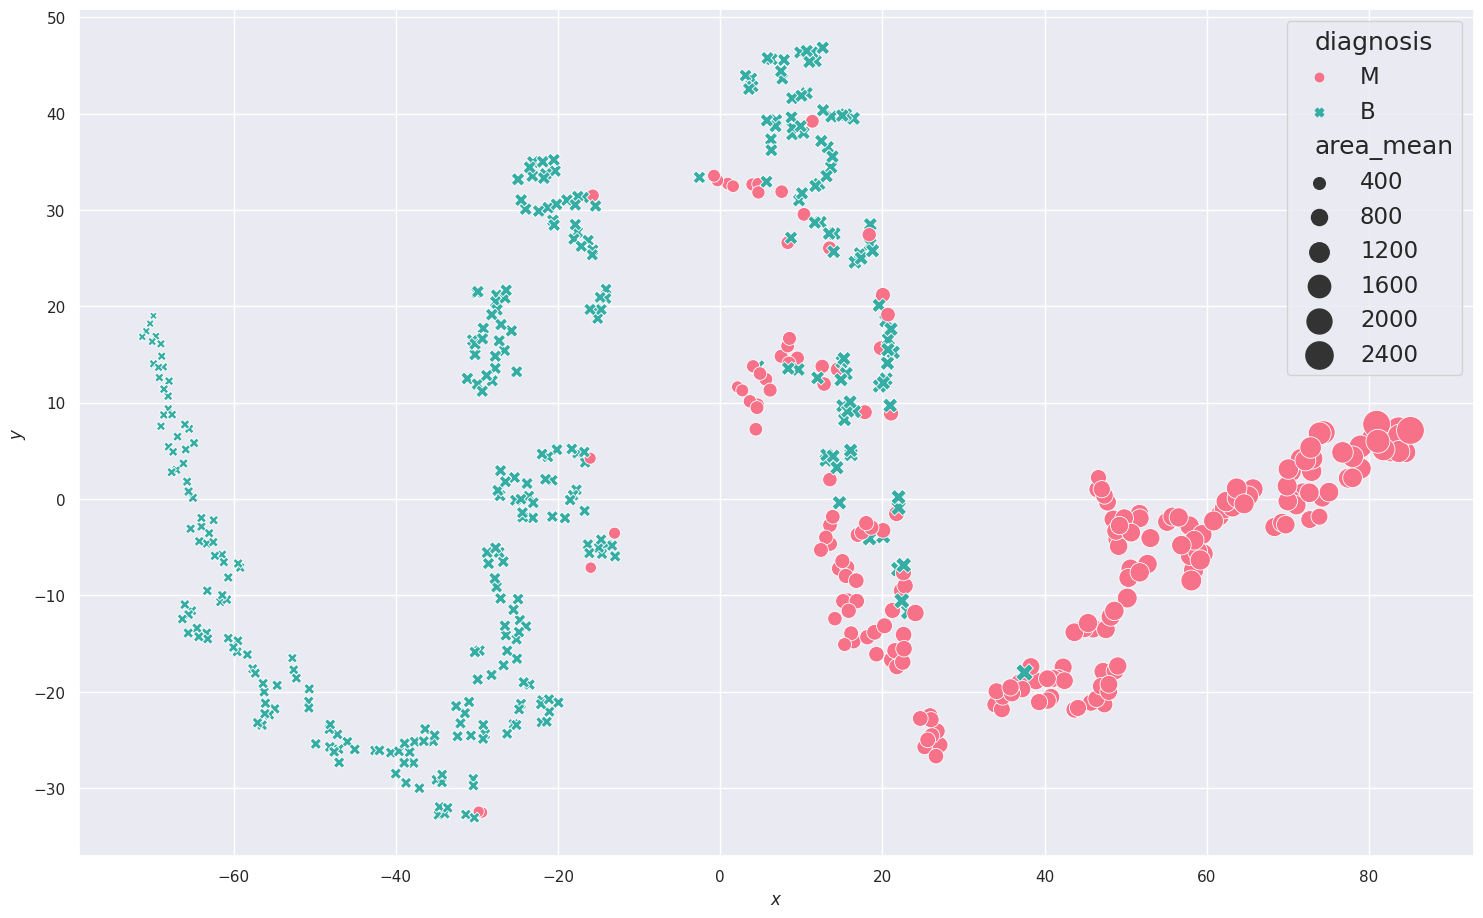

In [ ]:
#Proyectar el conjunto de datos en un plano bidimensional
cdf = df.drop(['diagnosis'], axis=1)

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df, df_tsne], axis=1)

#Diagrama
fig, ax = plt.subplots(figsize=(18, 11))

with sns.plotting_context("notebook", font_scale=1.5):
                        sns.scatterplot(x='x',
                        y='y',
                        hue='diagnosis',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 2),
                        data=dff,
                        ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

El diagrama es altamente no lineal, pero la mayoría de las muestras malignas se encuentran en la mitad del plano donde y < 0. Desafortunadamente, también un porcentaje moderado de muestras benignas se encuentra en esta región, por lo que no esperamos una separación perfecta. En este caso, es muy difícil entender la geometría real, pero t-SNE garantiza que la distribución bidimensional tiene la menor entropía relativa (medida que se utiliza para cuantificar la diferencia o la distancia entre dos distribuciones de probabilidad) con la original.

El conjunto de datos es de alta dimensionalidad y los clusters (conglomerados) no son convexos, por lo que no podemos esperar una segmentación perfecta.

Cuando se dice que los clústeres (clusters) no son convexos, significa que la forma de los grupos de puntos o muestras en el espacio de alta dimensionalidad no se asemeja a una forma geométrica simple y convexa, como un círculo, una esfera o un hiperplano. En otras palabras, los clústeres tienen formas complejas, irregulares o no uniformes que pueden incluir bordes curvos, componentes dispersas o regiones no continuas.

# **3. CLUSTERING**

El análisis de conglomerados (normalmente llamado simplemente "clustering") es un ejemplo de una tarea en la que deseamos encontrar características comunes entre conjuntos grandes de muestras.

Un algoritmo de clustering se basa en la suposición implícita de que las muestras pueden agruparse según sus similitudes.

## **3.1. K-Means**

K-Means es un método de aprendizaje automático utilizado para el clustering de datos.

➡️ `KMeans()`: El objetivo de K-Means es dividir un conjunto de datos en grupos o clústeres, de modo que los puntos de datos dentro de un mismo clúster sean más similares entre sí que con los puntos de otros clústeres.

Parámetros:

> ●   `n_clusters`: Especifica el número de clústeres (K) que se deben encontrar en el conjunto de datos. Es uno de los parámetros más importantes y generalmente se establece según el conocimiento del dominio o se determina utilizando técnicas de selección de K, como el método del codo o la silueta.

> ●   `init`: Este parámetro determina cómo se inicializan los centroides de los clústeres. Puede tomar valores como "k-means++" (inicialización inteligente predeterminada), "random" (inicialización aleatoria), o se puede proporcionar una matriz de centroides iniciales.

> ●   `n_init`: Especifica cuántas veces se ejecutará el algoritmo K-Means con diferentes centroides iniciales. Los resultados de estas ejecuciones se comparan y se selecciona el mejor clúster. El valor predeterminado es 10.

> ●   `max_iter`: Este parámetro establece el número máximo de iteraciones permitidas para converger. Si el algoritmo no converge antes de alcanzar este número de iteraciones, se detiene. El valor predeterminado es 300.

> ●   `tol`: La tolerancia para la convergencia del algoritmo. Si la diferencia entre los centroides en iteraciones sucesivas es menor que esta tolerancia, se considera que el algoritmo ha convergido. El valor predeterminado es 1e-4 (0.0001).

> ●   `precompute_distances`: Determina si se deben precalcular las distancias entre los puntos de datos y los centroides. Puede ser "auto," "True" o "False."

> ●   `random_state`: La semilla aleatoria utilizada para la inicialización de centroides. Puedes especificar un valor entero para reproducibilidad o usar "None" para una inicialización aleatoria.



### **Modelo 1**

✅ Paso 1 - Modelo

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km1 = KMeans(n_clusters=2, max_iter=1000, random_state=1000)

✅ Paso 2 - Predicción

In [ ]:
Y_pred = km1.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

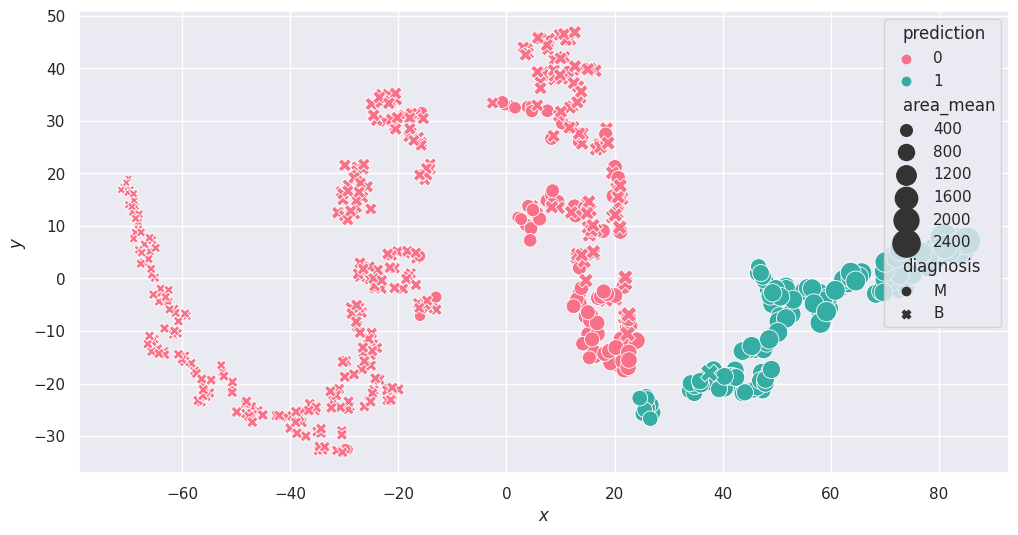

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

with sns.plotting_context("notebook", font_scale=1):
        sns.scatterplot(x='x',
                        y='y',
                        hue='prediction',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 2),
                        data=kmdff,
                        ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

El resultado es bastante preciso para y < -20, pero el algoritmo no es capaz de incluir también los puntos en el límite (y ≈ 0) en el clúster maligno principal. Esto se debe principalmente a la no convexidad de los conjuntos originales y es muy difícil resolver el problema utilizando K-means. Además, en la proyección, la mayoría de las muestras malignas con y ≈ 0 se mezclan con las benignas, por lo que la probabilidad de error también es alta con otros métodos basados en la proximidad.

✅ Paso 3 - Métricas de evaluación

Comprender el rendimiento de los métodos de aprendizaje no supervisado es inherentemente mucho más difícil que los métodos de aprendizaje supervisado porque, a menudo, no hay una solución "mejor" clara y definitiva. Para el aprendizaje supervisado, existen muchas métricas de rendimiento robustas, siendo la más directa de estas la precisión, que implica comparar las etiquetas predichas por el modelo con las etiquetas reales y ver cuántas el modelo acertó. Desafortunadamente, para el agrupamiento (clustering), no tenemos etiquetas en las que confiar y debemos desarrollar una comprensión de cuán "diferentes" son nuestros conglomerados.

➡️ `Inertia`:  La forma más sencilla de evaluar el rendimiento de K-means y elegir un número apropiado de clusters se basa en la comparación de diferentes inercias finales. La "inercia" se refiere a una métrica que se utiliza para evaluar la calidad del agrupamiento o la dispersión de los puntos de datos en un cluster. En otras palabras, la inercia mide cuánto están dispersos los puntos de datos dentro de un cluster.

Fórmula:

```
Inertia = ∑ (Distancia Media al Centroide en cada Cluster)
```
Donde:

*   Para cada clúster en el conjunto de datos, se calcula la distancia media entre todas las muestras dentro del clúster y el centroide de ese clúster. La distancia media se calcula utilizando la distancia euclidiana, que es una medida común en el contexto de K-means. La distancia euclidiana entre dos puntos (vectores) se calcula como la raíz cuadrada de la suma de las diferencias cuadradas entre sus coordenadas.
*   Se suman todas estas distancias medias de cada clúster.
*   El resultado es el valor de la inercia.

En un buen agrupamiento, los puntos de datos dentro de un cluster deben estar cerca de su centroide, lo que da como resultado una inercia baja. Por otro lado, en un mal agrupamiento, los puntos de datos pueden estar dispersos lejos de su centroide, lo que da como resultado una inercia alta.

En resumen, la inercia es una medida que evalúa cuán compactos y cercanos están los puntos de datos dentro de un clúster, y se utiliza para ayudar a determinar el número adecuado de clústeres en un algoritmo de agrupamiento como K-Means.

In [ ]:
# Inertia como función del número de clusters

inertias = []

for i in range(2, 51):
    km = KMeans(n_clusters=i, max_iter=1000, random_state=1000)
    km.fit(cdf)
    inertias.append(km.inertia_)

Cuando se trabaja con K-Means para determinar el número óptimo de clusters, se calcula la inercia para diferentes valores de K (número de clusters) y se busca un punto de inflexión en la curva de la inercia en función de K. El número de clústeres en el que la disminución en la inercia se vuelve menos significativa puede considerarse un buen candidato para el número óptimo de clústeres.

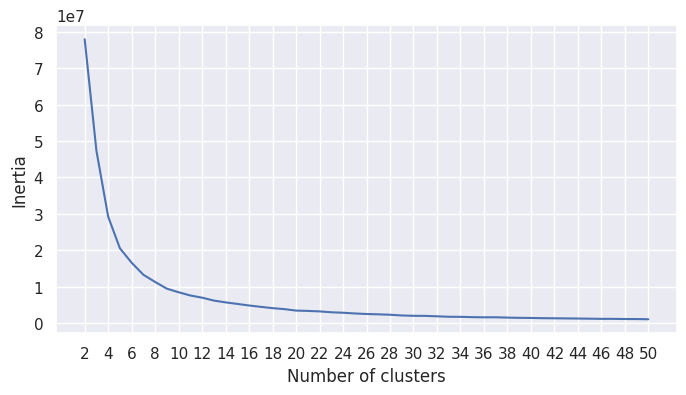

In [ ]:
# Inertia VS numero de clusters
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(np.arange(2, 51, 1), inertias)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_xticks(np.arange(2, 51, 2))

plt.show()

En este caso, el diagnóstico sugiere que deberíamos agrupar en dos grupos correspondientes a los diagnósticos. Sin embargo, el gráfico muestra un descenso drástico que termina en K=8 y continúa con una pendiente más baja hasta alrededor de K=40. Durante el análisis preliminar, hemos visto que la proyección bidimensional está compuesta por muchas manchas aisladas que comparten el mismo diagnóstico. Por lo tanto, podríamos decidir utilizar, por ejemplo, K=8 y analizar las características correspondientes a cada clúster. Dado que no se trata de una tarea de clasificación, el diagnóstico puede utilizarse como la principal referencia, pero un análisis exploratorio correcto puede intentar comprender la composición de las subestructuras para proporcionar más detalles a los técnicos (por ejemplo, médicos).

➡️ `Silhouette Score()`: La métrica de Silueta funciona analizando qué tan bien se ajusta un punto dentro de su conglomerado.

Fórmula:
```
S(i)= b(i)−a(i)/(max(a(i),b(i))
```
Donde:

*   S(i) es el puntaje Silhouette para el punto i.
*   a(i) es la distancia promedio de i a todos los demás puntos en el mismo clúster.
*   b(i) es la distancia promedio de i a todos los puntos en el clúster más cercano distinto del que i pertenece.

El puntaje Silhouette se calcula para cada punto en el conjunto de datos, y el puntaje Silhouette promedio se utiliza para evaluar la calidad general del agrupamiento. El puntaje Silhouette está en el rango de -1 a 1, donde un puntaje más alto indica que los puntos están bien agrupados y tienen una distancia significativamente mayor entre clústeres en comparación con la distancia dentro del clúster.

También podemos utilizar las Puntuaciones de Silueta para encontrar el número óptimo de "K" conglomerados para nuestros métodos de aprendizaje no supervisado.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Calcula el silhouette_score
SS_1 = silhouette_score(cdf, Y_pred)

# Imprime el resultado
print("Silhouette Score:", SS_1)

Silhouette Score: 0.6972646156059465


El resultado sugiere que los clústeres son bastante homogéneos y están bien separados, lo que es una indicación positiva de que el algoritmo de K-Means ha funcionado bien en la agrupación de tus datos en dos clústeres. Sin embargo, para una evaluación completa, es recomendable probar con diferentes valores de K y comparar los Silhouette Scores para determinar el número óptimo de clústeres para tu conjunto de datos.

➡️ `Completeness score`: Es una métrica de evaluación utilizada en problemas de agrupamiento (clustering) para medir cuántos de los puntos de datos que pertenecen a una misma clase en los datos originales también se agrupan juntos en el mismo clúster después de aplicar un algoritmo de agrupamiento.

La completitud se refiere a la capacidad del algoritmo de agrupamiento para capturar todas las muestras que pertenecen a una misma clase en el conjunto de datos original. En otras palabras, mide si todos los puntos de datos que comparten una etiqueta de clase en los datos originales están agrupados juntos en un solo clúster.

Fórmula:

```
Completeness Score = Σ [H(Ci) / N]
```
Donde:

*   Σ representa la suma sobre todos los clústeres Ci.
*   H(Ci) es la entropía de las muestras en el clúster Ci en relación con las clases reales (etiquetas verdaderas de clase). La entropía mide cuánta incertidumbre hay en la distribución de las clases dentro del clúster. Cuanto más concentradas estén las clases en un clúster, menor será la entropía.
*   N es el número total de muestras en el conjunto de datos.

Un puntaje de completitud cercano a 1.0 indica que el algoritmo de agrupamiento ha tenido éxito en agrupar todas las muestras de una misma clase en un solo clúster, mientras que un puntaje más bajo indica que algunas muestras de la misma clase se han distribuido en diferentes clústeres.

In [ ]:
from sklearn.metrics import completeness_score

In [ ]:
CS_1 = completeness_score(kmdff['diagnosis'], kmdff['prediction'])
print('Completeness: {}'.format(CS_1))

Completeness: 0.5168089972809706


Este resultado confirma que, para K=2, K-means no es capaz de separar perfectamente los clústeres, ya que, como hemos visto, hay algunas muestras malignas que se asignan incorrectamente al clúster que contiene la gran mayoría de las muestras benignas. Sin embargo, dado que c no es extremadamente pequeño, podemos estar seguros de que la mayoría de las muestras de ambas clases se han asignado a diferentes clústeres.

➡️ `Homogeneity score`: El puntaje de homogeneidad (homogeneity score) es una métrica complementaria a las mencionadas anteriormente y se basa en la suposición de que un clúster debe contener solo muestras que tengan la misma etiqueta verdadera.

En otras palabras, la homogeneidad mide qué tan bien un algoritmo de agrupamiento puede agrupar muestras que realmente pertenecen a la misma clase en el conjunto de datos original. Un puntaje de homogeneidad cercano a 1.0 indica que los clústeres son altamente homogéneos, es decir, cada clúster contiene principalmente muestras de una sola clase. En cambio, un puntaje más bajo sugiere que los clústeres son menos homogéneos y que pueden contener muestras de diferentes clases.

La homogeneidad se calcula utilizando la información de las etiquetas reales de las muestras y las etiquetas de clústeres asignadas por el algoritmo de agrupamiento. Cuanto más similar sea la etiqueta de clúster de una muestra a la etiqueta real de su clase, mayor será el puntaje de homogeneidad.

El cálculo del puntaje de homogeneidad se basa en la entropía condicional y la información mutua entre las etiquetas de clase reales y las etiquetas de clúster. Un puntaje de homogeneidad alto indica una buena capacidad del algoritmo de agrupamiento para agrupar muestras correctamente según sus etiquetas de clase reales.

Fórmula:

```
Homogeneity Score = 1 - H(U|C) / H(U)
```

Donde:

*   H(U|C) es la entropía condicional de las muestras en función de las clases reales (etiquetas verdaderas de clase) dada la asignación a los clústeres. Cuanto menor sea la entropía condicional, mayor será la homogeneidad.
*   H(U) es la entropía de las clases reales en el conjunto de datos completo.

El resultado de esta métrica está en el rango [0, 1], donde un puntaje de homogeneidad de 1.0 indica que los clústeres son perfectamente homogéneos en términos de clases, es decir, cada clúster contiene muestras de una sola clase. Un puntaje más bajo indica una menor homogeneidad y sugiere que las muestras de una misma clase pueden estar dispersas en varios clústeres.

La puntuación de homogeneidad se utiliza para evaluar cuán bien los clústeres reflejan la estructura real de clases en el conjunto de datos. Junto con la puntuación de completitud y otras métricas, proporciona una visión más completa de la calidad de la agrupación.


In [ ]:
from sklearn.metrics import homogeneity_score

In [ ]:
HS_1 = homogeneity_score(kmdff['diagnosis'], kmdff['prediction'])
print('Homogeneity: {}'.format(HS_1))

Homogeneity: 0.42229071246999117


Este valor (en particular, para K=2) confirma nuestro análisis inicial. Al menos un clúster (el que contiene la mayoría de las muestras benignas) no es completamente homogéneo, ya que contiene muestras pertenecientes a ambas clases. Sin embargo, como el valor no está muy cerca de 0, podemos estar seguros de que las asignaciones son parcialmente correctas. Considerando ambos valores, h (homogeneidad) y c (completitud), podemos deducir que K-means no está funcionando extremadamente bien (probablemente debido a la no convexidad), pero, al mismo tiempo, es capaz de separar correctamente todas aquellas muestras cuya distancia al clúster más cercano está por encima de un umbral específico. Cabe mencionar que, con conocimiento de la verdad absoluta (las etiquetas reales de las muestras), no podemos aceptar fácilmente el rendimiento de K-means y debemos buscar otro algoritmo que sea capaz de obtener tanto h como c → 1.

➡️ `V-measure`: La métrica "V-Measure" es una métrica de evaluación utilizada en problemas de agrupamiento (clustering) que combina la homogeneidad (homogeneity) y la completitud (completeness) para proporcionar una medida global de la calidad de los clústeres. La V-Measure mide la similitud entre las etiquetas reales de clase y las etiquetas de clúster asignadas por un algoritmo de agrupamiento.

Fórmula:

```
V-Measure = (2 * homogeneity * completeness) / (homogeneity + completeness)
```

Donde:

*   Homogeneidad (homogeneity) mide la capacidad del algoritmo de agrupamiento para agrupar muestras que pertenecen a la misma clase en el conjunto de datos original.
*   Completitud (completeness) mide la capacidad del algoritmo de agrupamiento para capturar todas las muestras que pertenecen a una misma clase en el conjunto de datos original.

La V-Measure toma valores en el rango de 0 a 1, donde un valor más alto indica una mejor calidad de los clústeres. Un valor de 1 significa que los clústeres son perfectamente coherentes con las etiquetas de clase reales, mientras que un valor de 0 indica que no hay concordancia entre los clústeres y las etiquetas de clase.

La V-Measure es una métrica útil porque considera tanto la homogeneidad como la completitud, lo que la hace más completa que las métricas individuales por separado. Ayuda a evaluar cuán bien los clústeres capturan la estructura de las clases en los datos, y es especialmente útil cuando las clases son desequilibradas o cuando se desea una medida global de calidad de agrupamiento.

In [ ]:
from sklearn.metrics import v_measure_score

In [ ]:
VS_1 = v_measure_score(kmdff['diagnosis'], kmdff['prediction'])
print('V-Score: {}'.format(VS_1))

V-Score: 0.46479332792160793


El puntaje V (V-Score o V-Measure) es, como se esperaba, una medida promedio que en este caso se ve negativamente influenciada por una homogeneidad más baja. Por supuesto, este índice no proporciona información diferente, por lo tanto, solo es útil para resumir completitud y homogeneidad en un solo valor. Sin embargo, con algunas manipulaciones matemáticas simples pero tediosas, es posible demostrar que la V-Measure también es simétrica (es decir, V(Y_pred|Y_true) = V(Y_true|Y_pred)); por lo tanto, dadas dos asignaciones independientes Y1 e Y2, V(Y1|Y2) es una medida de acuerdo entre ellas. Este escenario no es extremadamente común, ya que otras medidas pueden lograr un mejor resultado. Sin embargo, este puntaje podría utilizarse, por ejemplo, para verificar si dos algoritmos (posiblemente basados en estrategias diferentes) tienden a producir las mismas asignaciones o si son discordantes. En el último caso, incluso si la verdad absoluta es desconocida, el científico de datos puede entender que una estrategia no es tan efectiva como la otra y comenzar un proceso de exploración para encontrar el algoritmo de agrupamiento óptimo.

➡️ `Adjusted Mutual Information (AMI) score`: Puntuación de Información Mutua Ajustada, es una métrica de evaluación utilizada en problemas de agrupamiento (clustering) que mide la similitud entre las etiquetas reales de clase y las etiquetas de clúster asignadas por un algoritmo de agrupamiento. El AMI es una métrica que ajusta la Información Mutua (MI) para corregir posibles problemas de normalización y escala.

La AMI se basa en la teoría de la información y calcula cuánta información compartida hay entre las etiquetas de clase reales y las etiquetas de clúster. Proporciona una medida de cuán bien el algoritmo de agrupamiento ha logrado capturar la estructura subyacente de las clases en los datos.

Fórmula:

```
AMI = [I(C; K) - E(I(C; K))] / [max(H(C), H(K)) - E(I(C; K))]
```
Donde:
*   I(C; K) es la información mutua entre las etiquetas reales de clase (C) y las asignaciones de clúster (K). La información mutua mide cuánta información compartida hay entre las dos distribuciones.
*   E(I(C; K)) es la esperanza de la información mutua bajo la suposición de que las asignaciones de clúster son asignadas al azar.
*   H(C) es la entropía de las etiquetas reales de clase.
*   H(K) es la entropía de las asignaciones de clúster.

El resultado de la AMI es un valor que está en el rango [-1, 1]. Un valor de 1 indica una perfecta concordancia entre las etiquetas de clase y las asignaciones de clúster, mientras que un valor de -1 indica una discordancia total. Un valor de 0 sugiere que las asignaciones de clúster son independientes de las etiquetas de clase, es decir, no hay información compartida.

La puntuación de AMI es útil porque tiene en cuenta tanto la información compartida como las posibles coincidencias aleatorias, lo que la hace robusta y adecuada para evaluar algoritmos de agrupamiento en una variedad de situaciones.

El AMI es especialmente útil cuando se desea una medida de evaluación que tenga en cuenta la posibilidad de asignaciones aleatorias, lo que lo hace adecuado para problemas de agrupamiento con un número variable de clústeres o tamaños de clústeres desiguales.

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

In [ ]:
AMI_1 = adjusted_mutual_info_score(kmdff['diagnosis'], kmdff['prediction'])
print('Adj. Mutual info: {}'.format(AMI_1))

Adj. Mutual info: 0.4640047128452087


El acuerdo es moderado y compatible con la otra medida. Suponiendo la presencia de permutaciones y la posibilidad de asignaciones al azar, Y_true y Y_pred comparten un nivel medio de información porque, como hemos discutido, K-means es capaz de asignar correctamente todas las muestras donde la probabilidad de superposición es despreciable, mientras tiende a considerar benignas muchas muestras malignas que están en el límite entre los dos clústeres (por el contrario, no comete asignaciones incorrectas para las muestras benignas). Sin ninguna indicación adicional, este índice sugiere también verificar otros algoritmos de agrupamiento que pueden manejar clústeres no convexos, porque la falta de información compartida se debe principalmente a la imposibilidad de capturar geometrías complejas utilizando bolas estándar (especialmente en el subespacio donde la superposición es más significativa).

➡️ `Adjusted Rand score`: Es una métrica para medir la similitud entre las etiquetas reales de clase y las etiquetas de clúster asignadas por un algoritmo de agrupamiento. El puntaje ajustado de Rand ajusta el índice de Rand estándar para corregir posibles problemas de normalización y escala.

El índice de Rand compara todas las parejas de muestras y mide cuántas de ellas se agrupan de la misma manera tanto en las etiquetas reales como en las etiquetas de clúster. Sin embargo, el problema con el índice de Rand estándar es que puede dar valores más altos simplemente debido al azar o al número de clústeres, lo que hace que la interpretación sea complicada.

El puntaje ajustado de Rand corrige este problema y proporciona una medida más confiable de la similitud entre las etiquetas de clúster y las etiquetas de clase. Se calcula mediante la siguiente fórmula:

Fórmula:
```
ARI = RI−Expected_RI/(max(RI)−Expected_RI )
```
Donde:

*   RI (Rand Index) es el índice de Rand, que mide la similitud entre las etiquetas reales de clase y las asignaciones de clúster. El índice de Rand se calcula como la suma de los pares de muestras que son iguales tanto en las etiquetas reales de clase como en las asignaciones de clúster, dividido por el número total de pares de muestras.
*   Expected_RI (Expected Rand Index) es el índice de Rand esperado bajo la suposición de que las asignaciones de clúster se hacen al azar.


El puntaje ajustado de Rand toma valores en el rango de -1 a 1. Un valor positivo indica que las etiquetas de clúster y las etiquetas de clase están más relacionadas de lo que se esperaría al azar, mientras que un valor negativo sugiere que las etiquetas de clúster y las etiquetas de clase están menos relacionadas de lo que se esperaría al azar. Un valor de 0 significa que no hay una relación significativa entre las etiquetas de clúster y las etiquetas de clase.

El puntaje ajustado de Rand es útil cuando se desea una medida de evaluación que tenga en cuenta la posibilidad de asignaciones aleatorias, lo que lo hace adecuado para problemas de agrupamiento con un número variable de clústeres o tamaños de clústeres desiguales. Proporciona una evaluación más confiable de la calidad del agrupamiento que el índice de Rand estándar.

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
ARI_1 = adjusted_rand_score(kmdff['diagnosis'], kmdff['prediction'])
print('Adj. Rand score: {}'.format(ARI_1))

Adj. Rand score: 0.49142453622455523


Este resultado es mejor que los otros índices, ya que el valor es mayor que -1 (extremo negativo). Confirma que la discrepancia entre las distribuciones no es muy pronunciada y se debe principalmente a un subconjunto limitado de muestras. Este puntaje es muy confiable y puede utilizarse también como una única métrica para evaluar el rendimiento de un algoritmo de agrupamiento. Un valor cercano a 0.5 confirma que es poco probable que K-means sea la solución óptima, pero al mismo tiempo, que el conjunto de datos tiene una geometría que puede capturarse casi por completo mediante bolas simétricas, excepto en algunas regiones no convexas con una alta probabilidad de superposición.

➡️ `Matriz de Contingencia`: Tabla bidimensional que se utiliza para comparar las etiquetas reales de clase con las etiquetas predichas por un algoritmo. Esta matriz es especialmente útil cuando se desea evaluar la calidad de un modelo de clasificación o un algoritmo de agrupamiento en función de su capacidad para asignar correctamente las muestras a las clases reales.

En una matriz de contingencia, las filas representan las etiquetas reales de clase, mientras que las columnas representan las etiquetas predichas por el algoritmo. Cada celda de la matriz contiene el número de muestras que pertenecen a una determinada combinación de etiqueta real y etiqueta predicha. Las dos etiquetas principales que se utilizan en una matriz de contingencia son:

Etiqueta real: Representa la clase a la que pertenece cada muestra en los datos reales. Es la verdad absoluta o la "respuesta correcta".

Etiqueta predicha: Representa la clase a la que un algoritmo de agrupamiento o clasificación asigna cada muestra.

La matriz de contingencia permite calcular diversas métricas de evaluación, como el Índice de Rand, la Información Mutua, la Homogeneidad y la Completitud, entre otras. Estas métricas se utilizan para medir la similitud entre las etiquetas reales y las etiquetas predichas y evaluar qué tan bien el modelo o algoritmo ha asignado las muestras a las clases correctas.

En resumen, una matriz de contingencia es una herramienta fundamental en la evaluación de la calidad de un modelo de clasificación o un algoritmo de agrupamiento al proporcionar una representación tabular de las asignaciones de etiquetas y permitir el cálculo de métricas de evaluación que cuantifican la calidad de las asignaciones.

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

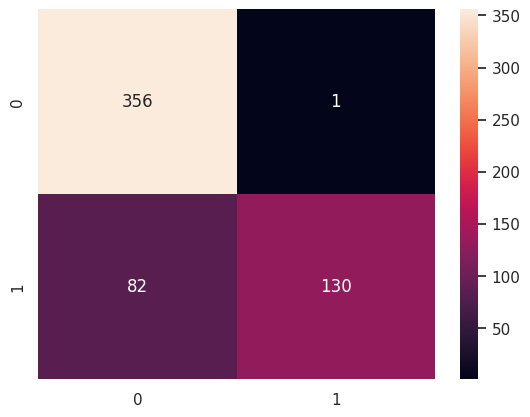

In [ ]:
# Compute and show the contingency matrix
matrix = contingency_matrix(kmdff['diagnosis'].apply(lambda x: 0 if x == 'B' else 1), kmdff['prediction'])

fig, ax = plt.subplots()

with sns.plotting_context("notebook"):
  sns.heatmap(matrix, annot=True, fmt='d', ax=ax)

plt.show()

Este resultado muestra que casi todas las muestras benignas han sido agrupadas correctamente, mientras que un porcentaje moderado de las malignas ha sido asignado erróneamente al primer clúster. Ya hemos tenido confirmación utilizando otras métricas, pero, de manera análoga a la matriz de confusión en tareas de clasificación, una matriz de contingencia permite la visualización inmediata de qué clases son las más difíciles de separar, ayudando al científico de datos a buscar una solución más efectiva.

### **Modelo 2**

✅ Paso 1 - Modelo

In [ ]:
km2 = KMeans(n_clusters=8, max_iter=1000, random_state=1000)

✅ Paso 2 - Predicción

In [ ]:
Y_pred = km2.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

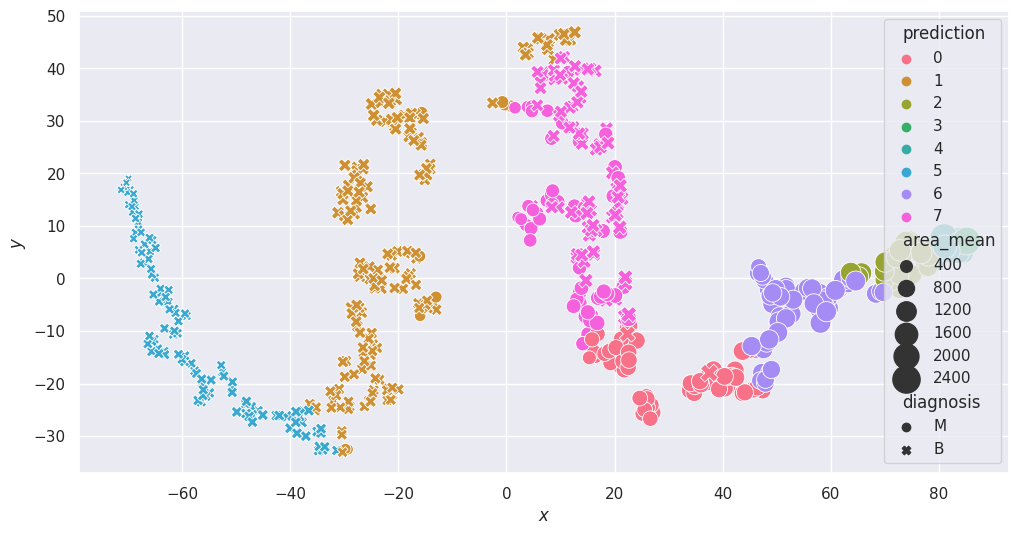

In [ ]:
# Show the result
fig, ax = plt.subplots(figsize=(12, 6))

with sns.plotting_context("notebook", font_scale=1):
        sns.scatterplot(x='x',
                        y='y',
                        hue='prediction',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 8),
                        data=kmdff,
                        ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

✅ Paso 3 - Métricas de evaluación

In [ ]:
SS_2 = silhouette_score(cdf, Y_pred)
CS_2 = completeness_score(kmdff['diagnosis'], kmdff['prediction'])
HS_2 = homogeneity_score(kmdff['diagnosis'], kmdff['prediction'])
VS_2 = v_measure_score(kmdff['diagnosis'], kmdff['prediction'])
AMI_2 = adjusted_mutual_info_score(kmdff['diagnosis'], kmdff['prediction'])
ARI_2 = adjusted_rand_score(kmdff['diagnosis'], kmdff['prediction'])

print("Silhouette Score:", SS_2)
print('Completeness: {}'.format(CS_2))
print('Homogeneity: {}'.format(HS_2))
print('V-Score: {}'.format(VS_2))
print('Adj. Mutual info: {}'.format(AMI_2))
print('Adj. Rand score: {}'.format(ARI_2))

Silhouette Score: 0.4645725087478533
Completeness: 0.24665834788923496
Homogeneity: 0.6394546378370277
V-Score: 0.35599709531334006
Adj. Mutual info: 0.3524286954955857
Adj. Rand score: 0.23519533273020504


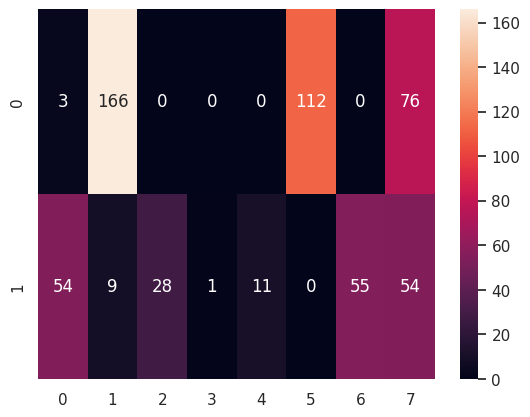

In [ ]:
# Compute and show the contingency matrix
matrix = contingency_matrix(kmdff['diagnosis'].apply(lambda x: 0 if x == 'B' else 1), kmdff['prediction'])

fig, ax = plt.subplots()

with sns.plotting_context("notebook"):
  sns.heatmap(matrix, annot=True, fmt='d', ax=ax)

plt.show()

   🟠  ¡Ahora es tu turno de interpretar los resultados!  🟠